In [1]:
# Dependencies
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Declare the database
db = client.ClimateData

In [3]:
# query the classroom collection for Indianapolis Ozone readings
indy_ozone_us_epa_data = db.US_EPA.find({"State Name":"Indiana","Parameter Name":"Ozone","City Name":"Indianapolis"})


In [4]:
# Check out the data
for indy_ozone_data in indy_ozone_us_epa_data:
    print(indy_ozone_data)

{'_id': ObjectId('5fcecd08524fae99d9fa60ce'), 'Parameter Name': 'Ozone', 'Year': 1995, 'Sample Duration': '1 HOUR', 'Pollutant Standard': 'Ozone 1-hour 1979', 'Metric Used': 'Daily maxima of observed hourly values (between 9:00 AM and 8:00 PM)', 'Method Name': 'INSTRUMENTAL - ULTRA VIOLET', 'Units of Measure': 'Parts per million', 'Max Value': 0.10400000000000001, 'Max DateTime': '1995-07-14 16:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcecd08524fae99d9fa60cf'), 'Parameter Name': 'Ozone', 'Year': 1995, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 1997', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.095, 'Max DateTime': '1995-07-14 11:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcecd08524fae99d9fa60d0'), 'Parameter Name'

{'_id': ObjectId('5fcecd2a524fae99d925375f'), 'Parameter Name': 'Ozone', 'Year': 2007, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 1997', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.08199999999999999, 'Max DateTime': '2007-05-23 10:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcecd2a524fae99d9253760'), 'Parameter Name': 'Ozone', 'Year': 2007, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 2008', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.08199999999999999, 'Max DateTime': '2007-05-23 10:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcecd2a524fae99d9253761'), 'Parameter Nam

In [5]:
# Put the query data into a DataFrame
indy_ozone_df = pd.DataFrame(list(db.US_EPA.find({"State Name":"Indiana","Parameter Name":"Ozone","City Name":"Indianapolis"})))
indy_ozone_df.head()

,_id,Parameter Name,Year,Sample Duration,Pollutant Standard,Metric Used,Method Name,Units of Measure,Max Value,Max DateTime,State Name,County Name,City Name
0,5fcecd08524fae99d9fa60ce,Ozone,1995,1 HOUR,Ozone 1-hour 1979,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET,Parts per million,0.104,1995-07-14 16:00,Indiana,Marion,Indianapolis
1,5fcecd08524fae99d9fa60cf,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,Daily maximum of 8 hour running average of obs...,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
2,5fcecd08524fae99d9fa60d0,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,Daily maximum of 8 hour running average of obs...,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
3,5fcecd08524fae99d9fa60d1,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,Daily maximum of 8-hour running average,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
4,5fcecd08524fae99d9fb0a9a,Ozone,1996,1 HOUR,Ozone 1-hour 1979,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET,Parts per million,0.109,1996-06-27 14:00,Indiana,Marion,Indianapolis


In [6]:
# Extract the columns we need for our chart
chart_indy_ozone_df = indy_ozone_df[['Max Value','Year']]
chart_indy_ozone_df.head()

,Max Value,Year
0,0.104,1995
1,0.095,1995
2,0.095,1995
3,0.095,1995
4,0.109,1996


In [7]:
# Find out how much data we have
len(chart_indy_ozone_df)

208

In [8]:
# Average all of the data for a year
avg_chart_indy_ozone_df = chart_indy_ozone_df.groupby(['Year']).agg({'Max Value':['mean']}).reset_index()
avg_chart_indy_ozone_df.columns = ['Year','Average_Value']

# Output some of the data
avg_chart_indy_ozone_df.head()

,Year,Average_Value
0,1995,0.094437
1,1996,0.097563
2,1997,0.088125
3,1998,0.096500
4,1999,0.094875


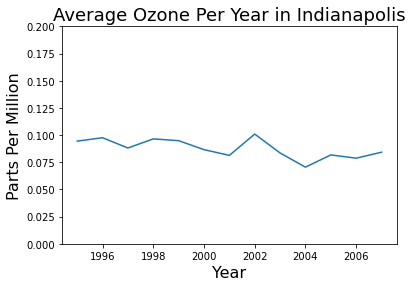

In [17]:
# Chart the result
plt.plot(avg_chart_indy_ozone_df['Year'], avg_chart_indy_ozone_df['Average_Value'])
plt.title('Average Ozone Per Year in Indianapolis', fontsize=18)
plt.ylabel('Parts Per Million', fontsize=16)
plt.ylim((0, 0.2))
plt.xlabel('Year', fontsize=16)

# Save a copy of the chart
plt.savefig('Images/Indy_Ozone.png', bbox_inches="tight")

plt.show()

In [10]:
# Pulls temperature data for Indianapolis
indy_temp_data = db.US_Temp_1995_2020.find({"State":"Indiana", "City":"Indianapolis"})


In [11]:
# Turns temperature data into Dataframe
indy_temp_df = pd.DataFrame(list(db.US_Temp_1995_2020.find({"State":"Indiana", "City":"Indianapolis"})))
indy_temp_df.head()

,_id,TempReading,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,5fcec944155a8b23457fe4f7,1887371,North America,US,Indiana,Indianapolis,1,1,1995,33.7
1,5fcec944155a8b23457fe4f8,1887372,North America,US,Indiana,Indianapolis,1,2,1995,19.9
2,5fcec944155a8b23457fe4f9,1887373,North America,US,Indiana,Indianapolis,1,3,1995,20.2
3,5fcec944155a8b23457fe4fa,1887374,North America,US,Indiana,Indianapolis,1,4,1995,10.9
4,5fcec944155a8b23457fe4fb,1887375,North America,US,Indiana,Indianapolis,1,5,1995,8.3


In [12]:
yearly_indy_temp_df = indy_temp_df[['Year','AvgTemperature']]
yearly_indy_temp_df.head()

,Year,AvgTemperature
0,1995,33.7
1,1995,19.9
2,1995,20.2
3,1995,10.9
4,1995,8.3


In [13]:
yearly_indy_temp_df = yearly_indy_temp_df.astype({"Year": int, "AvgTemperature": float})

In [14]:
# Average all of the temperature data for a year
avg_indy_temp_df = yearly_indy_temp_df.groupby(['Year']).agg({'AvgTemperature':['mean']}).reset_index()
avg_indy_temp_df.columns = ['Year','Average Temperature (F)']
avg_indy_temp_df = avg_indy_temp_df.drop(avg_indy_temp_df[(avg_indy_temp_df['Year'] == 2020)].index)
avg_indy_temp_df


,Year,Average Temperature (F)
0,1995,52.635068
1,1996,49.906831
2,1997,51.511781
3,1998,54.633699
4,1999,54.301096
5,2000,52.718579
6,2001,54.312603
7,2002,51.936164
8,2003,51.901644
9,2004,53.422951


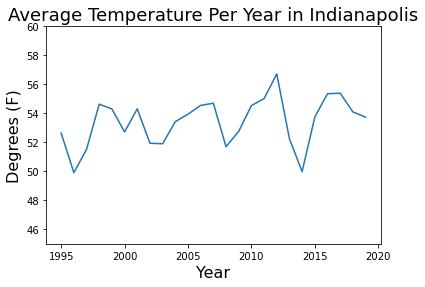

In [15]:
# Charts the above dataframe
plt.plot(avg_indy_temp_df['Year'], avg_indy_temp_df['Average Temperature (F)'])
plt.title('Average Temperature Per Year in Indianapolis', fontsize=18)
plt.ylabel('Degrees (F)', fontsize=16)
plt.ylim(45,60)
plt.xlabel('Year', fontsize=16)

# Saves a copy of the chart
plt.savefig('Images/Avg_Indy_Temperatures.png', bbox_inches="tight")

plt.show()